In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import re 
from operator import itemgetter
import warnings
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
import PyCCELL_PRFQT as px

C:\Users\nessl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


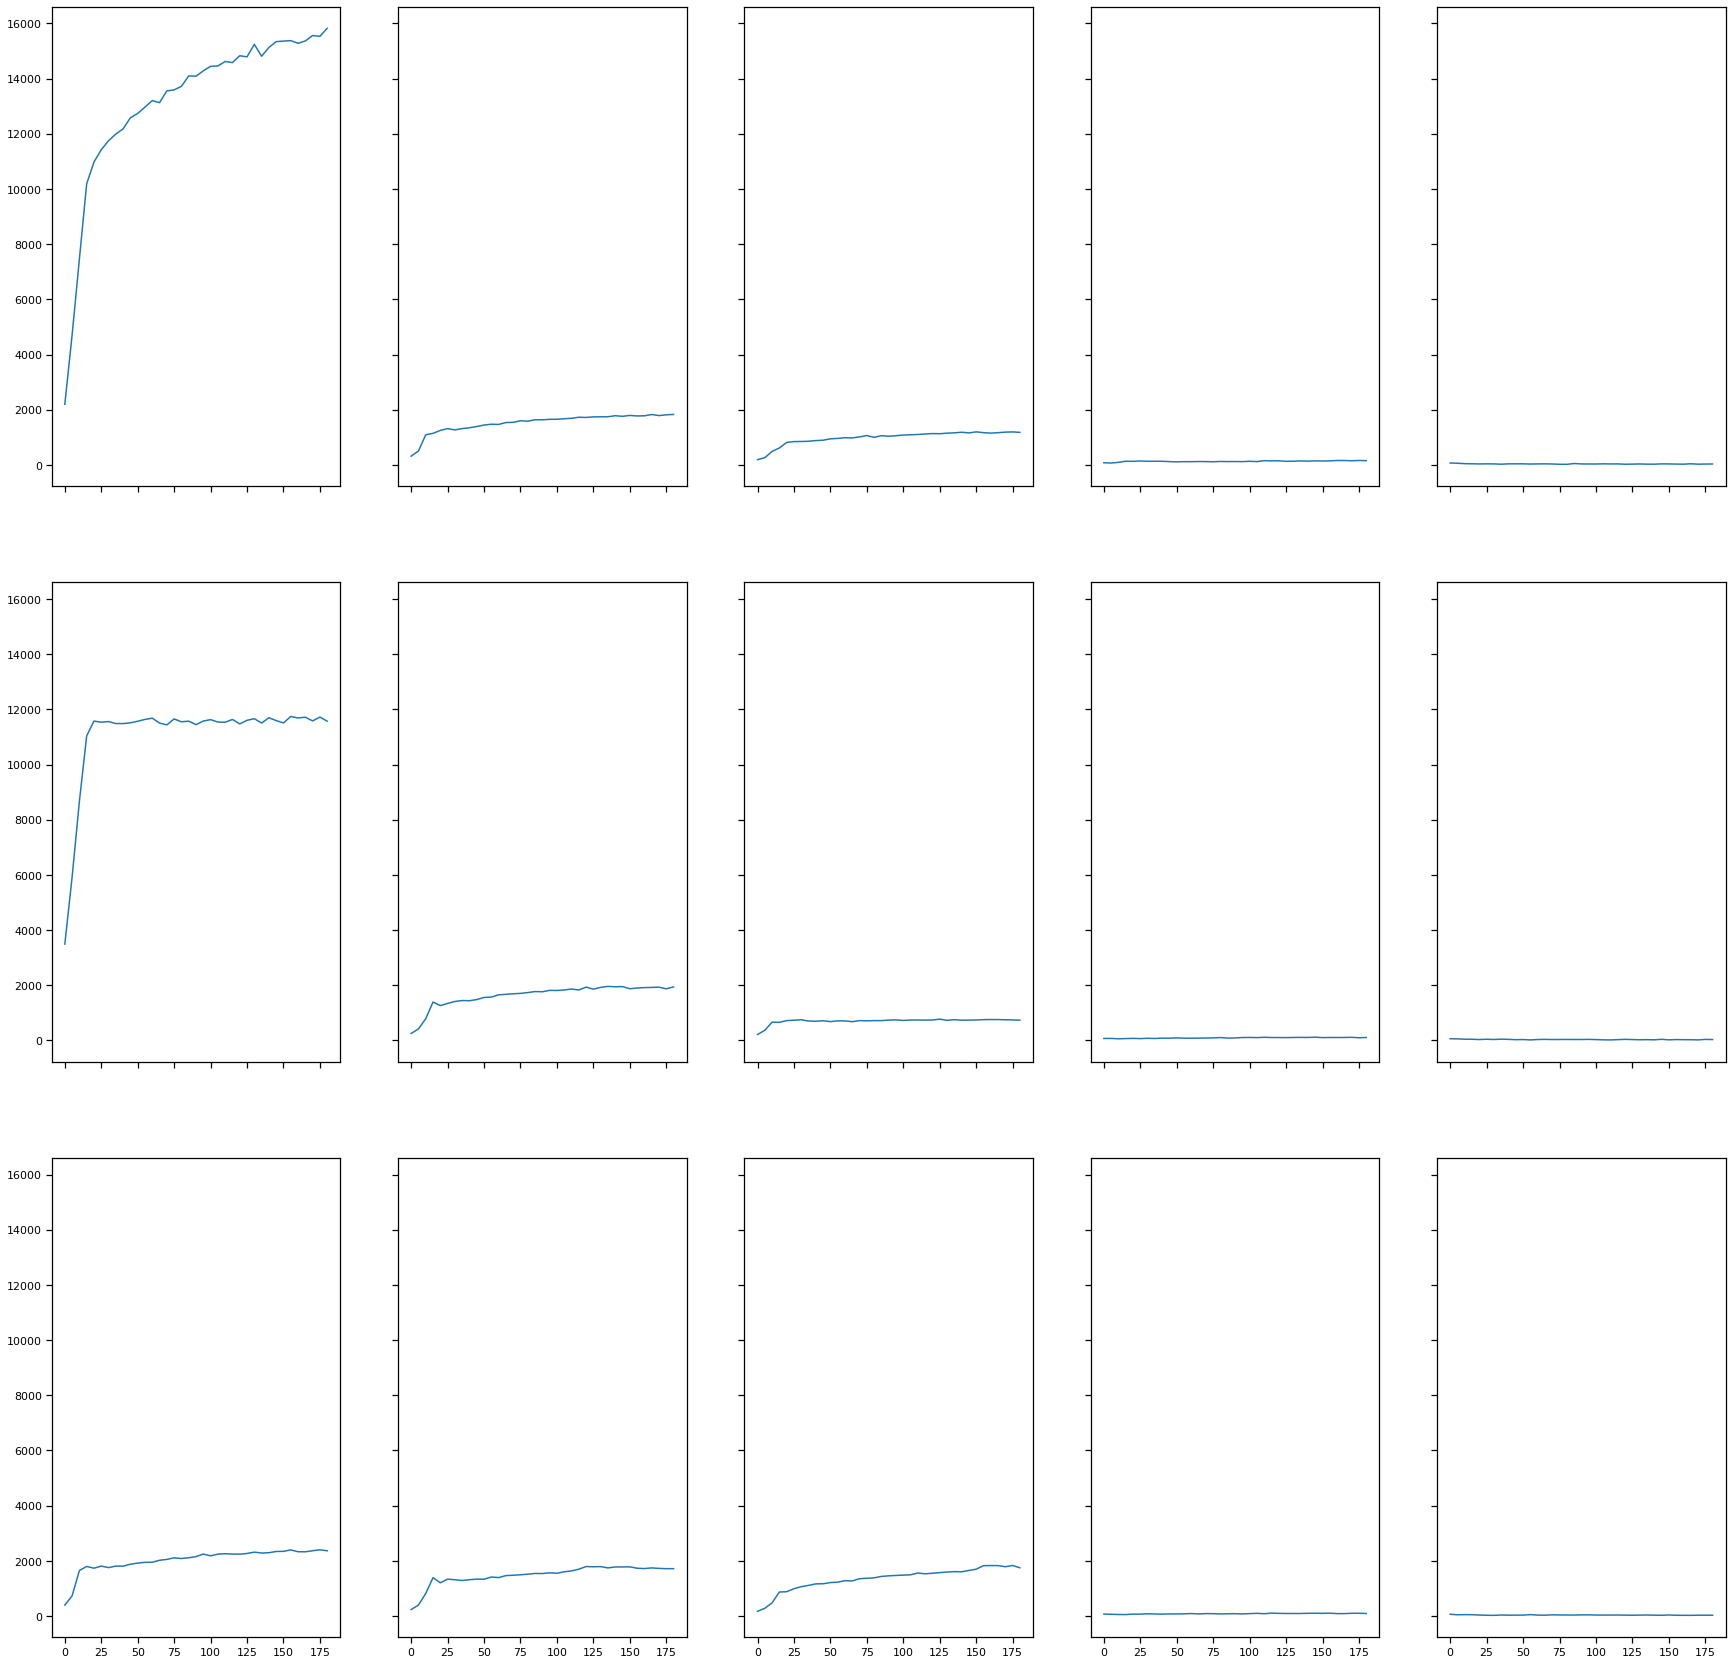

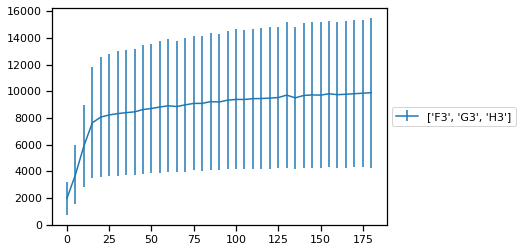

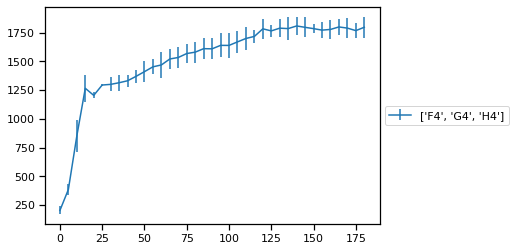

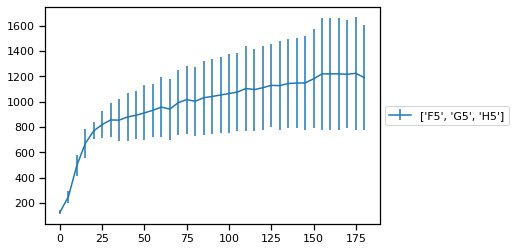

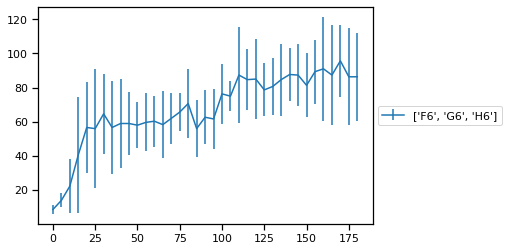

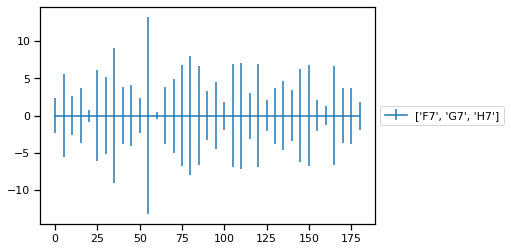

In [65]:
test,std = px.main('results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_2.xlsx'
               ,70,"NO",3,5,'col',['F7','G7','H7'],"NO")


In [66]:
test.rename(columns={"['F3', 'G3', 'H3']": '2µM_P_Cold',
                   "['F4', 'G4', 'H4']": '2µM_P',
                     "['F5', 'G5', 'H5']":'1µM_P' ,
                     "['F6', 'G6', 'H6']": '0.1µM_P',
                    "['F7', 'G7', 'H7']": 'NC_wt_cas'},
          inplace=True, errors='raise')

test.head()

,2µM_P_Cold,2µM_P,1µM_P,0.1µM_P,NC_wt_cas,Time
0,1963.000000,203.000000,127.333333,8.666667,0.0,0
1,3732.333333,385.333333,249.000000,14.000000,0.0,5
2,5879.000000,851.333333,496.000000,22.333333,0.0,10
3,7631.666667,1266.000000,670.000000,40.666667,0.0,15
4,8060.000000,1204.333333,769.666667,56.666667,0.0,20


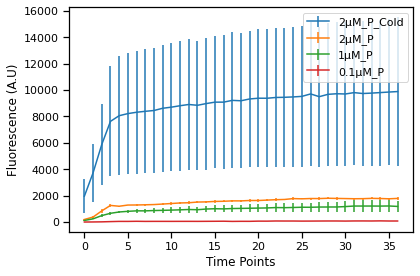

In [67]:
sns.set_context("notebook")
test[['2µM_P_Cold','2µM_P','1µM_P','0.1µM_P']].plot(yerr=std)
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

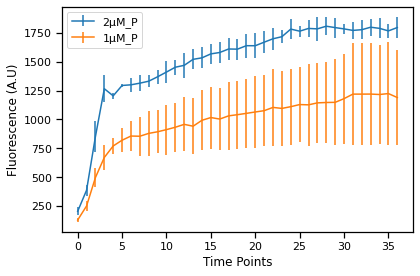

In [68]:
test[['2µM_P','1µM_P']].plot(yerr=[std[1],std[2]])
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

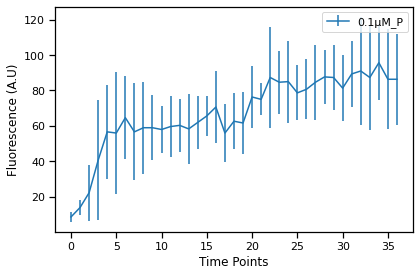

In [69]:
test[['0.1µM_P']].plot(yerr=std[3])
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.legend()
plt.tight_layout()
plt.savefig("images/SHERLOCK/probe_dilution_pt3.png",dpi=300)
plt.show()

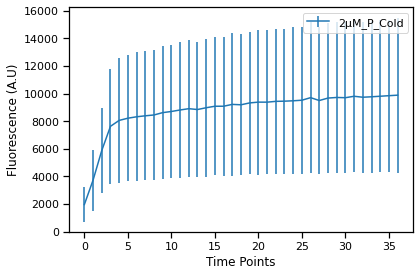

In [55]:
test[['2µM_P_Cold']].plot(yerr=std[0])
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.legend()
plt.tight_layout()
plt.savefig("images/SHERLOCK/probe_dilution_pt4.png",dpi=300)
plt.show()

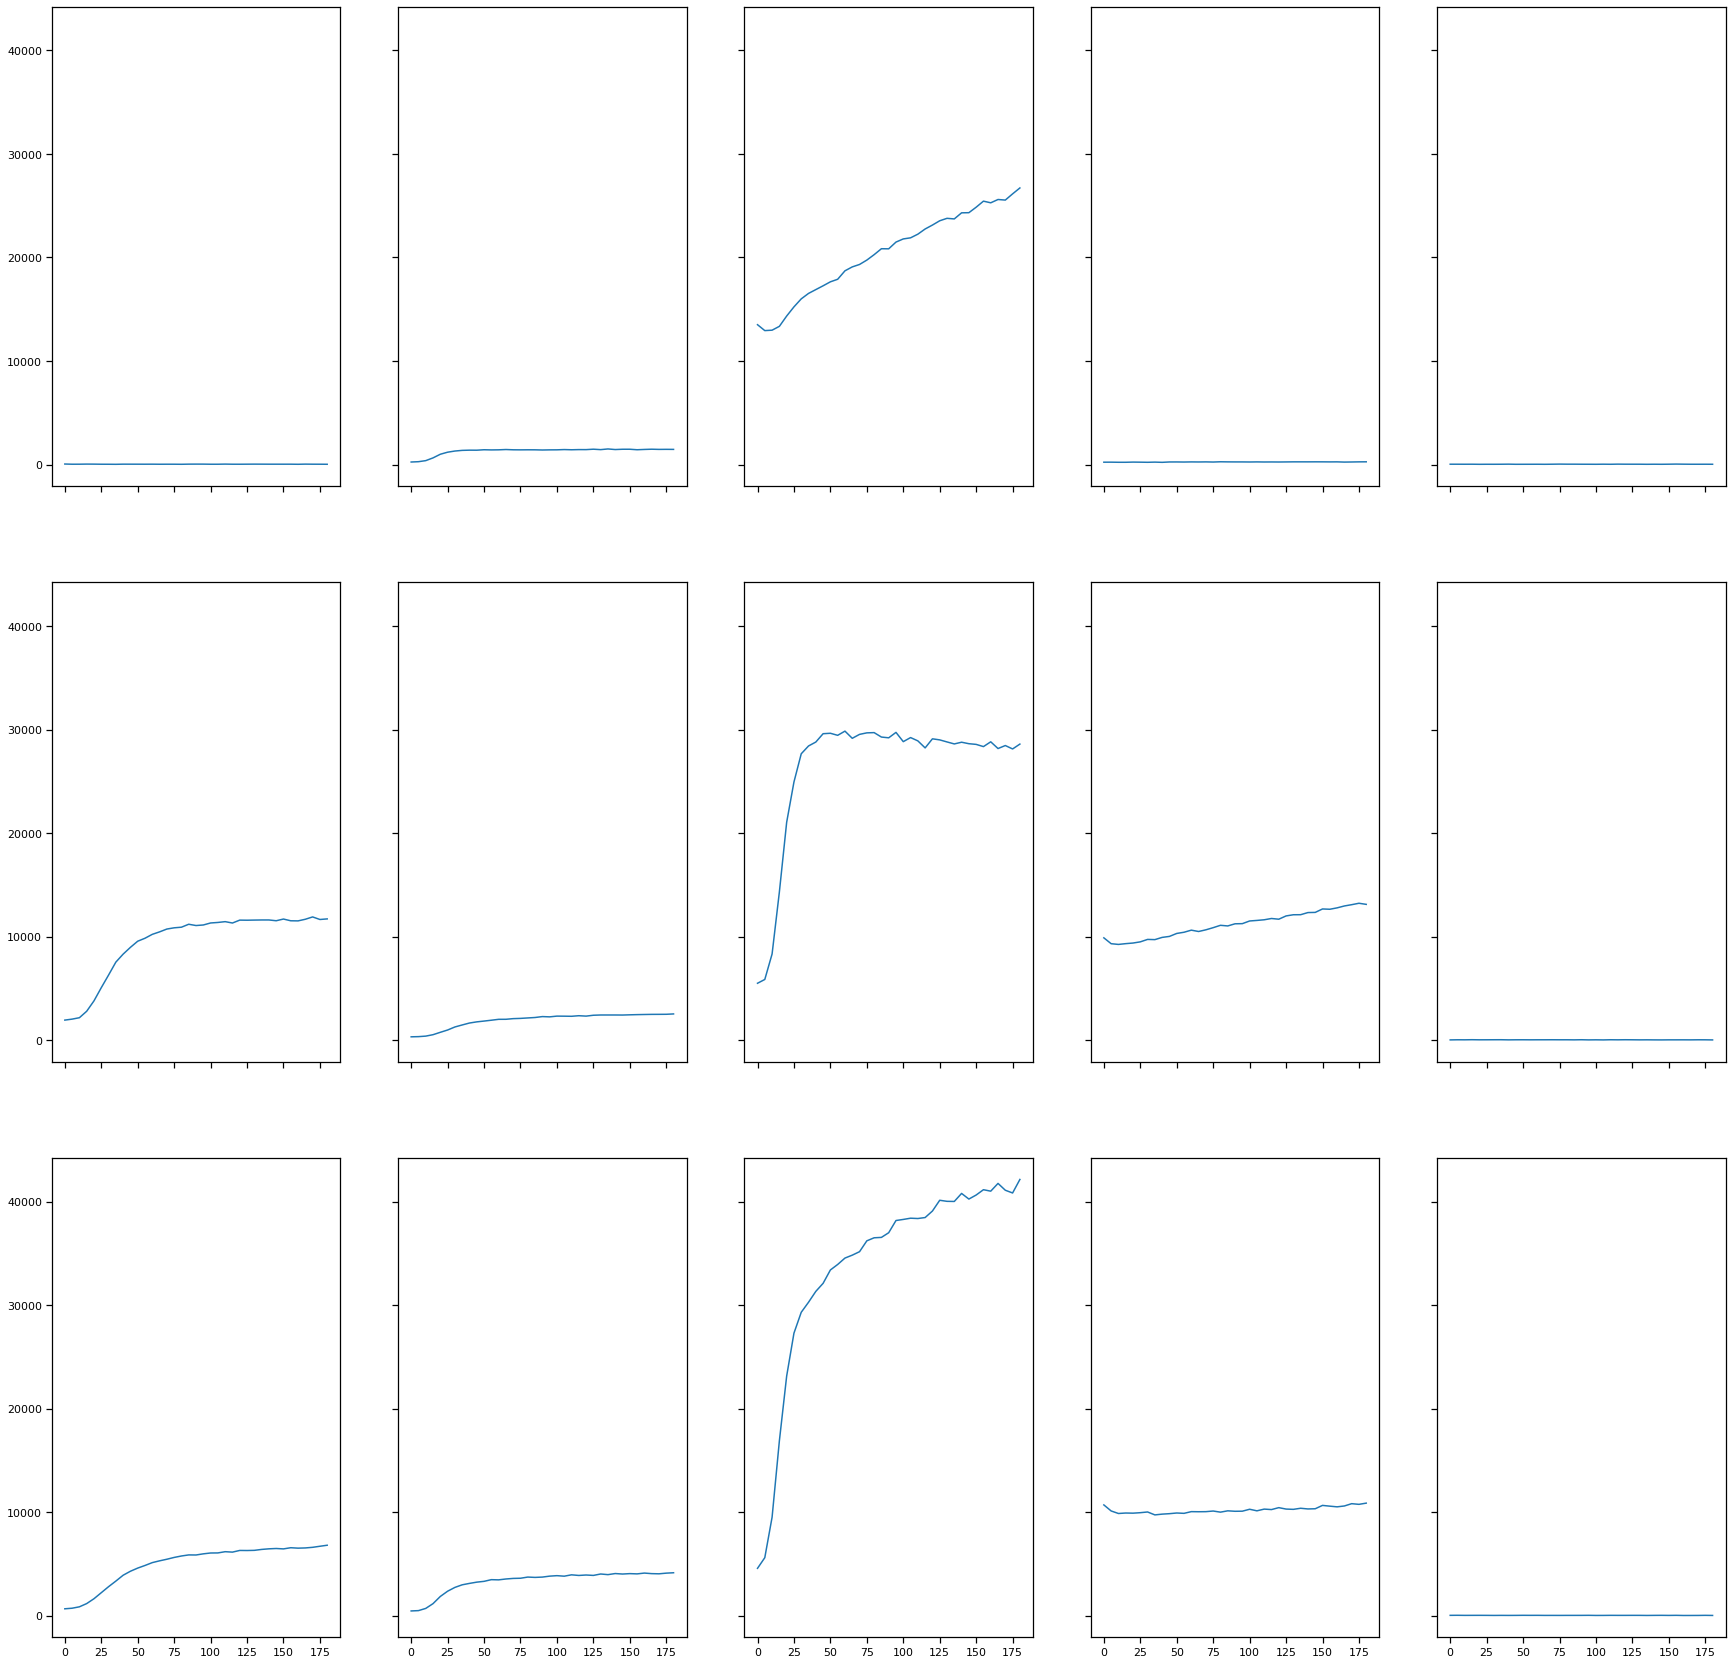

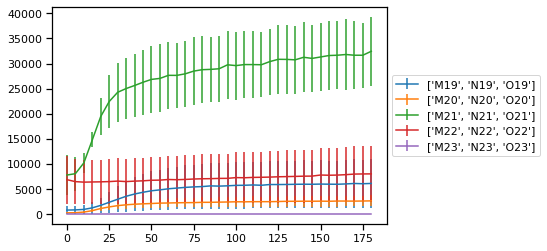

In [70]:
test_2,std_2 = px.main('results/SHERLOCK/1st_try_probe_dilution/first_sherlock_probe_concentr_modif.xlsx',50
            ,"NO",3,5,'col',['M23', 'N23', 'O23'],"YES")

In [57]:
test_2.columns

Index(['['M19', 'N19', 'O19']', '['M20', 'N20', 'O20']',
       '['M21', 'N21', 'O21']', '['M22', 'N22', 'O22']',
       '['M23', 'N23', 'O23']', 'Time'],
      dtype='object', name=0)

In [72]:
test_2.rename(columns={"['M19', 'N19', 'O19']": '2µM_P', "['M20', 'N20', 'O20']":'1µM_P',
       "['M21', 'N21', 'O21']": '0.1µM_P', "['M22', 'N22', 'O22']":'experimental_error',
       "['M23', 'N23', 'O23']": 'NC_wt_cas'},
          inplace=True, errors='raise')

test_2.head()

,2µM_P,1µM_P,0.1µM_P,experimental_error,NC_wt_cas,Time
0,853.666667,311.333333,7826.000000,6903.666667,0.0,0
1,892.333333,332.666667,8096.000000,6516.000000,0.0,5
2,987.666667,458.666667,10234.666667,6412.333333,0.0,10
3,1298.666667,742.000000,14808.333333,6447.333333,0.0,15
4,1792.666667,1172.333333,19470.333333,6473.333333,0.0,20


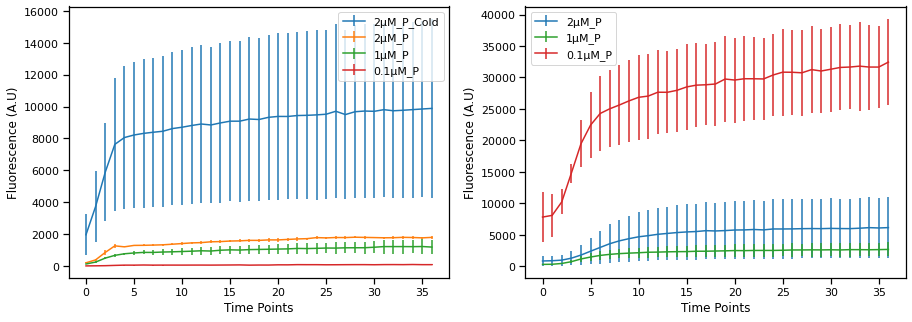

In [80]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['2µM_P_Cold','2µM_P','1µM_P','0.1µM_P']].plot(yerr=std,ax=ax[0])
test_2[['2µM_P','1µM_P','0.1µM_P']].plot(yerr=std_2,ax=ax[1],color=['tab:blue','tab:green','tab:red'])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()


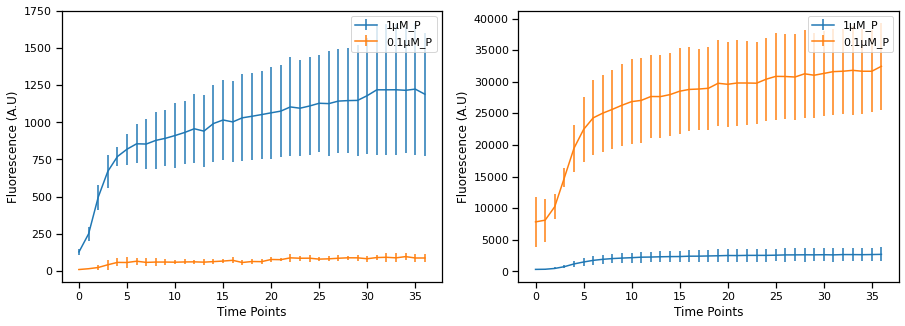

In [75]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['1µM_P','0.1µM_P']].plot(yerr=[std[2],std[3]],ax=ax[0])
test_2[['1µM_P','0.1µM_P']].plot(yerr=[std_2[1],std_2[2]],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()


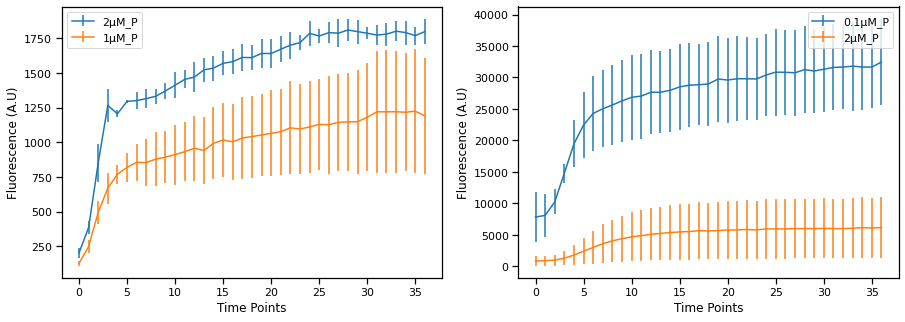

In [77]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['2µM_P','1µM_P']].plot(yerr=[std[1],std[2]],ax=ax[0])
test_2[['0.1µM_P','2µM_P']].plot(yerr=[std_2[2],std_2[0]],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

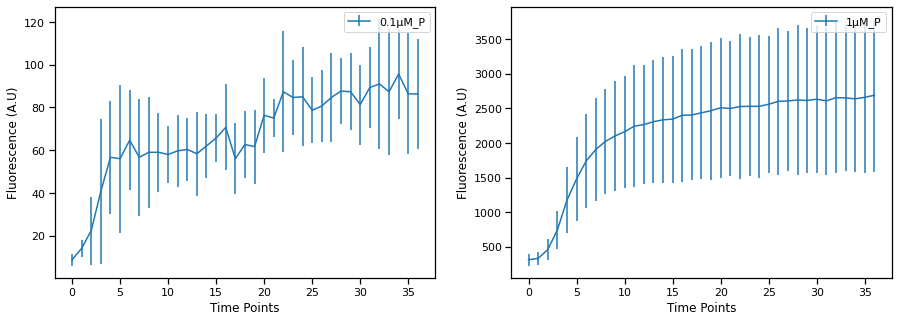

In [78]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['0.1µM_P']].plot(yerr=[std[3]],ax=ax[0])
test_2[['1µM_P']].plot(yerr=[std_2[1]],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

In [ ]:
def syst2(t,z,param):
    
    z = Tu,Pa,Pi
        
    param = K3,GC,Km 
    
    dPadt = (K3*GC*Pi)/(Km+Pi)
    #dPadt = (K3*Tu*GC*Pi)/(Km+Tu)
    
    return [dPadt]

def error(param,obs):
    
    times = np.linspace(0,35,35)
    t = np.linspace(0,500,500)
    
    sol = solve_ivp(syst2,t_span =[0, times.max()], y0= z , args =([param]),
                    t_eval=times,method='DOP853',dense_output=True,rtol=1e-8,atol=1e-8)
    
    m = sol.sol(times)
    
    err = []
        
    for i in range(len(m.tolist()[0])):
        err.append((obs[i]-m.tolist()[0][i])**2)    
    
    erro = np.sum(err)

    if erro < 0.05:
        print(erro)
    return erro

In [ ]:
Tu = 0.001
Pa = 0.15
Pi = 2

K3 = 0.01
GC = 10 

Km = 100

t = np.linspace(0,500,500)

z = [Tu,Pa,Pi]

param  = [K3,GC,Km]


bnds = [(0.001,1),(0.1,100),(1,100)]
res = optimize.minimize(error, param, args=(list(test[test.columns[2]])))

In [ ]:
res.x

In [ ]:
times = np.linspace(0,180,37)

sol = solve_ivp(syst2,t_span =[0, times.max()], y0= z , args =([res.x]),
                    t_eval=times,dense_output=True)
m = sol.sol(times)
plt.plot(times,m.T)
plt.plot(times,test[test.columns[2]])
#plt.ylim(0,1)
plt.show()

In [ ]:
sol = solve_ivp(syst2,t_span =[0, times.max()], y0= z , args =([res.x]),
                    t_eval=times,dense_output=False)
sol.t

In [ ]:
m